In [1]:
%matplotlib inline

import pickle as pkl
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\hinoue\Anaconda3\envs\tf16gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data')

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
def model_inputs(real_dim, z_dim):
    inputs_real = tf.placeholder(tf.float32, (None, real_dim), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    
    return inputs_real, inputs_z

In [4]:
def generator(z, out_dim, n_units=128, reuse=False, alpha=0.01):
    with tf.variable_scope('generator', reuse=reuse):
        h1 = tf.layers.dense(z, n_units, activation=None)
        h1 = tf.maximum(alpha * h1, h1) #Leaky ReLU
        
        logits = tf.layers.dense(h1, out_dim, activation=None)
        out = tf.tanh(logits)
        
        return out

In [5]:
def discriminator(x, n_units=128, reuse=False, alpha=0.01):
    with tf.variable_scope('discriminator', reuse=reuse):
        h1 = tf.layers.dense(x, n_units, activation=None)
        h1 = tf.maximum(alpha*h1, h1)
        logits = tf.layers.dense(h1, 1, activation=None)
        out = tf.sigmoid(logits)
        
        return out, logits

In [6]:
#　ハイパーパラメーターの初期化

input_size = 784
z_size = 100
g_hidden_size = 128
d_hidden_size = 128
alpha = 0.01
smooth = 0.1

In [7]:
# グラフの定義を行う
tf.reset_default_graph()
input_real, input_z = model_inputs(input_size, z_size)

g_model = generator(input_z, input_size, n_units=g_hidden_size, alpha=alpha)

d_model_real, d_logits_real = discriminator(input_real, n_units=d_hidden_size, alpha=alpha)
d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, n_units=d_hidden_size, alpha=alpha)

In [8]:
#損失関数の定義
d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,
                                            labels=tf.ones_like(d_logits_real)*(1 - smooth)))
d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                            labels = tf.zeros_like(d_logits_real)))
d_loss = d_loss_real + d_loss_fake

g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                               labels=tf.ones_like(d_logits_fake)))

In [9]:
#最適化手法の定義
learning_rate = 0.002

t_vars = tf.trainable_variables()
g_vars = [var for var in t_vars if var.name.startswith('generator')]
d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

d_train_optimize = tf.train.AdamOptimizer(learning_rate).minimize(d_loss, var_list=d_vars)
g_train_optimize = tf.train.AdamOptimizer(learning_rate).minimize(g_loss, var_list=g_vars)

## バッチデータの確認

In [10]:
batch_size = 100
batch = mnist.train.next_batch(batch_size)

In [11]:
batch

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([9, 7, 1, 5, 5, 6, 1, 6, 5, 7, 9, 3, 0, 4, 3, 7, 1, 3, 4, 9, 6, 8,
        3, 0, 7, 4, 2, 2, 3, 4, 9, 8, 5, 8, 2, 3, 1, 0, 5, 8, 9, 2, 3, 2,
        6, 0, 1, 0, 8, 8, 5, 3, 3, 2, 1, 0, 0, 2, 7, 9, 2, 5, 1, 5, 0, 6,
        9, 8, 5, 4, 1, 1, 2, 7, 0, 9, 0, 4, 6, 3, 6, 1, 2, 5, 4, 3, 7, 8,
        7, 3, 8, 8, 5, 0, 5, 1, 0, 8, 0, 4], dtype=uint8))

In [12]:
batch[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
len(batch[0])

100

In [14]:
batch[0][0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
batch[1][0]

9

## トレーニングの実行

In [17]:
epochs = 100
samples = []
losses = []
saver = tf.train.Saver(var_list=g_vars)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(epochs):
        for i in range(mnist.train.num_examples//batch_size):
            batch = mnist.train.next_batch(batch_size)
            
            batch_images = batch[0].reshape((batch_size, 784))
            batch_images = batch_images * 2 - 1
            
            # Generator
            batch_z = np.random.uniform(-1,1,size=(batch_size, z_size))
            
            _ = sess.run(d_train_optimize, feed_dict={input_real: batch_images, input_z: batch_z})
            _ = sess.run(g_train_optimize, feed_dict={input_z: batch_z})
            
        train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
        train_loss_g = g_loss.eval({input_z: batch_z})
        
        print("エポック {}/{} ".format(e+1, epochs),
        "D ロス: {:.4f} ".format(train_loss_d),
        "G ロス: {:.4f} ".format(train_loss_g))
            
        losses.append((train_loss_d, train_loss_g))
        
        sample_z = np.random.uniform(-1, 1, size=(16,z_size))
        gen_samples = sess.run(generator(input_z, input_size, n_units=g_hidden_size, reuse=True, alpha=alpha),
                              feed_dict={input_z: sample_z})
        samples.append(gen_samples)
        saver.save(sess, './checkpoints/generator.ckpt')
        
with open('training_samples.pkl', 'wb') as f:
    pkl.dump(samples, f)
            
            

エポック 1/100  D ロス: 0.3491  G ロス: 4.2107 
エポック 2/100  D ロス: 0.3521  G ロス: 4.1985 
エポック 3/100  D ロス: 0.4171  G ロス: 5.1126 
エポック 4/100  D ロス: 0.7076  G ロス: 4.9005 
エポック 5/100  D ロス: 1.7375  G ロス: 6.3893 
エポック 6/100  D ロス: 0.5795  G ロス: 4.1674 
エポック 7/100  D ロス: 0.7874  G ロス: 2.5728 
エポック 8/100  D ロス: 1.0674  G ロス: 2.0808 
エポック 9/100  D ロス: 1.1287  G ロス: 1.9480 
エポック 10/100  D ロス: 0.6797  G ロス: 3.4176 
エポック 11/100  D ロス: 1.3497  G ロス: 4.0107 
エポック 12/100  D ロス: 0.9117  G ロス: 2.8150 
エポック 13/100  D ロス: 1.1963  G ロス: 1.9346 
エポック 14/100  D ロス: 0.9367  G ロス: 2.3809 
エポック 15/100  D ロス: 1.0503  G ロス: 1.4567 
エポック 16/100  D ロス: 0.9164  G ロス: 2.3549 
エポック 17/100  D ロス: 0.9587  G ロス: 2.1877 
エポック 18/100  D ロス: 0.9699  G ロス: 1.7745 
エポック 19/100  D ロス: 1.5260  G ロス: 2.1919 
エポック 20/100  D ロス: 1.1846  G ロス: 1.4996 
エポック 21/100  D ロス: 1.0214  G ロス: 2.2015 
エポック 22/100  D ロス: 1.0079  G ロス: 1.7084 
エポック 23/100  D ロス: 1.2036  G ロス: 1.5648 
エポック 24/100  D ロス: 0.9873  G ロス: 1.6938 
エポック 25/100  D ロス: 1.5265

## 収束プロセスの可視化

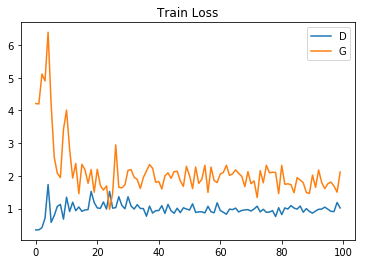

In [19]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='D')
plt.plot(losses.T[1], label='G')
plt.title('Train Loss')
plt.legend()

## イメージに変換して表示する

In [28]:
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(7,7), nrows=4, ncols=4, sharey=True, sharex=True)
    for ax,img in zip(axes.flatten(), samples[epoch]):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')
                       
    return fig, axes
        

In [29]:
with open('training_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

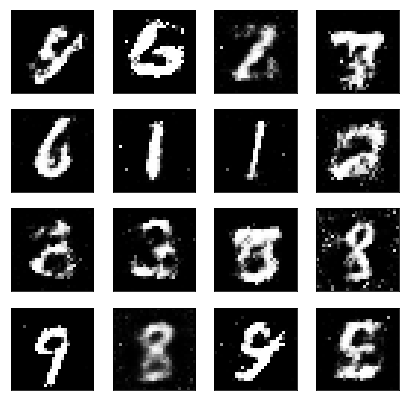

In [30]:
_ = view_samples(-1, samples)

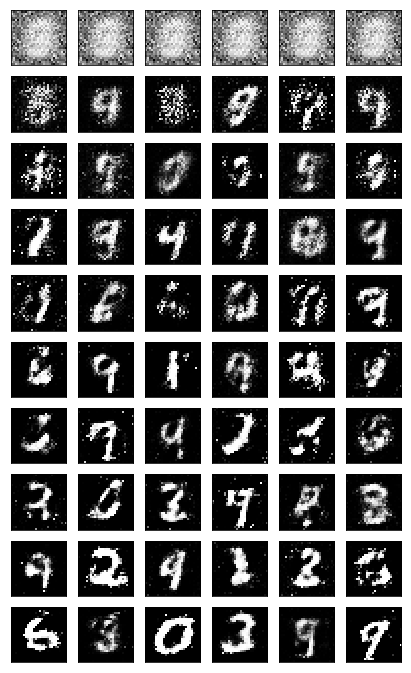

In [32]:
rows, cols = 10, 6
fig, axes = plt.subplots(figsize=(7,12), nrows=rows, ncols=cols,sharex=True, sharey=True)

for sample, ax_row in zip(samples[::int(len(samples)/rows)], axes):
    for img, ax in zip(sample[::int(len(sample)/cols)], ax_row):
        ax.imshow(img.reshape((28,28)), cmap='Greys_r')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

## チェックポイントファイルから機械に画像を生成させる

INFO:tensorflow:Restoring parameters from checkpoints\generator.ckpt


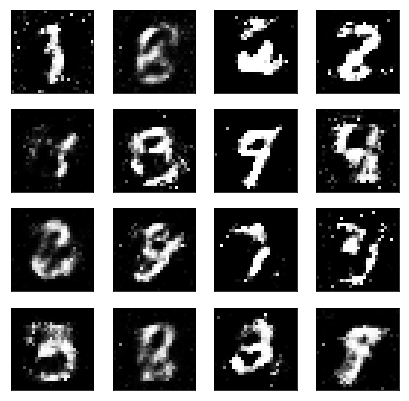

In [33]:
saver = tf.train.Saver(var_list=g_vars)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    sample_z = np.random.uniform(-1,1, size=(16, z_size))
    gen_samples = sess.run(generator(input_z, input_size, n_units=g_hidden_size, reuse=True, alpha=alpha),
                          feed_dict={input_z: sample_z})
_ = view_samples(0, [gen_samples])